In [ ]:
import prodimopy.read as pread
import prodimopy.plot as pplot
import prodimopy.plot_models as ppms
from matplotlib.backends.backend_pdf import PdfPages
import pickle
from tqdm import tqdm
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simpson
from scipy.constants import h as planck_h
from scipy.constants import k as boltzmann_k
from scipy.constants import c as speed_of_light
from scipy.constants import astronomical_unit as au
from scipy.constants import parsec as pc
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
with open('ProDiMoData1000_N.pkl', 'rb') as f:
    models = pickle.load(f)

In [7]:
for i,model in enumerate(models):
    print(i, '--------')
    print(model.elements)

0 --------
name   12    X/H
H     12.000 1.000e+00
He    10.984 9.638e-02
C      7.640 4.365e-05
N      8.900 7.943e-04
O      7.980 9.550e-05
Ne     7.950 8.913e-05
Na     3.360 2.291e-09
Mg     4.030 1.072e-08
Si     4.240 1.738e-08
S      5.270 1.862e-07
Ar     6.080 1.202e-06
Fe     3.240 1.738e-09
PAH    3.444 2.778e-09

1 --------
name   12    X/H
H     12.000 1.000e+00
He    10.984 9.638e-02
C      7.640 4.365e-05
N      8.900 7.943e-04
O      8.230 1.698e-04
Ne     7.950 8.913e-05
Na     3.360 2.291e-09
Mg     4.030 1.072e-08
Si     4.240 1.738e-08
S      5.270 1.862e-07
Ar     6.080 1.202e-06
Fe     3.240 1.738e-09
PAH    3.444 2.778e-09

2 --------
name   12    X/H
H     12.000 1.000e+00
He    10.984 9.638e-02
C      7.640 4.365e-05
N      8.900 7.943e-04
O      8.480 3.020e-04
Ne     7.950 8.913e-05
Na     3.360 2.291e-09
Mg     4.030 1.072e-08
Si     4.240 1.738e-08
S      5.270 1.862e-07
Ar     6.080 1.202e-06
Fe     3.240 1.738e-09
PAH    3.444 2.778e-09

3 --------
name 

PLOT: plot_cont ...
PLOT: plot_cont ...


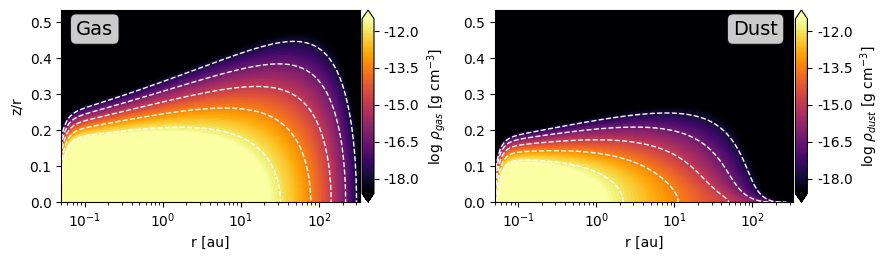

In [9]:
for i,model in enumerate(models):
    if i != 12:
        continue
    # use subplots to plot the gas density and dust density next to each other
    fig, axs = plt.subplots(1, 2, figsize=(9, 4))
    pp = pplot.Plot(None)
    # This can be very useful is one wants to have multiple plots with a similar style
    # Here we also change the color map
    constyle = {"cmap": "inferno", "extend": "both", "cb_format": "%.1f", "zlim": [3.e-19, 3.e-12]}

    fig = pp.plot_cont(model, model.rhog, label=r"log $\rho_{gas}$ [g cm$^{-3}$]", ax=axs[0], **constyle)
    fig = pp.plot_cont(model, model.rhod, label=r"log $\rho_{dust}$ [g cm$^{-3}$]", ax=axs[1], **constyle)

    # we do not need the z/r axis in the second plot
    axs[1].set_ylabel("")

    # place some text boxes on the plots
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    axs[0].text(0.05, 0.95, "Gas", transform=axs[0].transAxes, fontsize=14,
                verticalalignment='top', bbox=props)

    ret = axs[1].text(0.95, 0.95, "Dust", transform=axs[1].transAxes, fontsize=14,
                      verticalalignment='top', horizontalalignment="right", bbox=props)
    plt.tight_layout()
plt.savefig('Figures/Density.pdf')
plt.show()

PLOT: plot_cont ...
PLOT: plot_cont ...


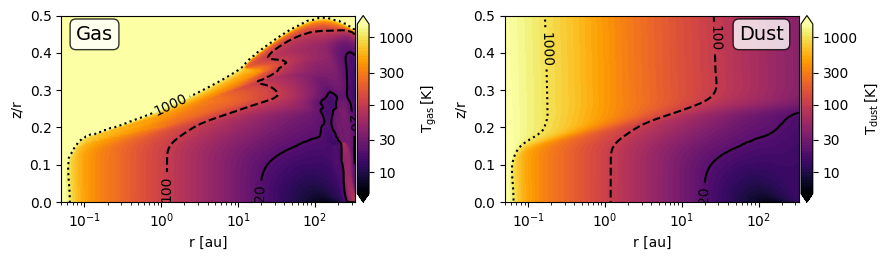

In [34]:
for i,model in enumerate(models):
    if i != 12:
        continue
    fig, axs = plt.subplots(1, 2, figsize=(9, 2.7))
    pp=pplot.Plot(None)

    tcont=pplot.Contour(model.tg, [20,100,1000], linestyles=["-","--",":"],
                      showlabels=True,label_fontsize=10,label_fmt="%.0f", colors='black')
    #tcont.label_locations=[(100,100),(55,5),(40,5)]

    # another contour, a simple one
    avcont=pplot.Contour(model.AV,[1.0],colors="black")

    cbticks=[10,30,100,300,1000]
    _ = pp.plot_cont(model, model.tg, r"$\mathrm{T_{gas}\,[K]}$",zr=True,xlog=True,
                    ylim=[0,0.5], zlim=[5,1500],extend="both",
                    oconts=[tcont],   # here the addtional contour added
                    contour=False,           # switch of the standard contours
                    clevels=cbticks,         # explictly set ticks for the cbar
                    clabels=map(str,cbticks),# and make some nice labels
                    cb_format="%.0f",
                    ax=axs[0],fig=fig, cmap='inferno')
    tcont=pplot.Contour(model.td, [20,100,1000], linestyles=["-","--",":"],
                      showlabels=True,label_fontsize=10,label_fmt="%.0f", colors='black')
    _ = pp.plot_cont(model, model.td, r"$\mathrm{T_{dust}\,[K]}$",zr=True,xlog=True,
                    ylim=[0,0.5], zlim=[5,1500],extend="both",
                    oconts=[tcont],   # here the addtional contour added
                    contour=False,           # switch of the standard contours
                    clevels=cbticks,         # explictly set ticks for the cbar
                    clabels=map(str,cbticks),# and make some nice labels
                    cb_format="%.0f",
                    ax=axs[1],fig=fig, cmap='inferno')
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    axs[0].text(0.05, 0.95, "Gas", transform=axs[0].transAxes, fontsize=14,
                verticalalignment='top', bbox=props)

    ret = axs[1].text(0.95, 0.95, "Dust", transform=axs[1].transAxes, fontsize=14,
                      verticalalignment='top', horizontalalignment="right", bbox=props)
    plt.tight_layout()
plt.savefig('Figures/Temperature.pdf')
plt.show()

PLOT: plot_abuncont_grid ...
[1e-15, 0.001]


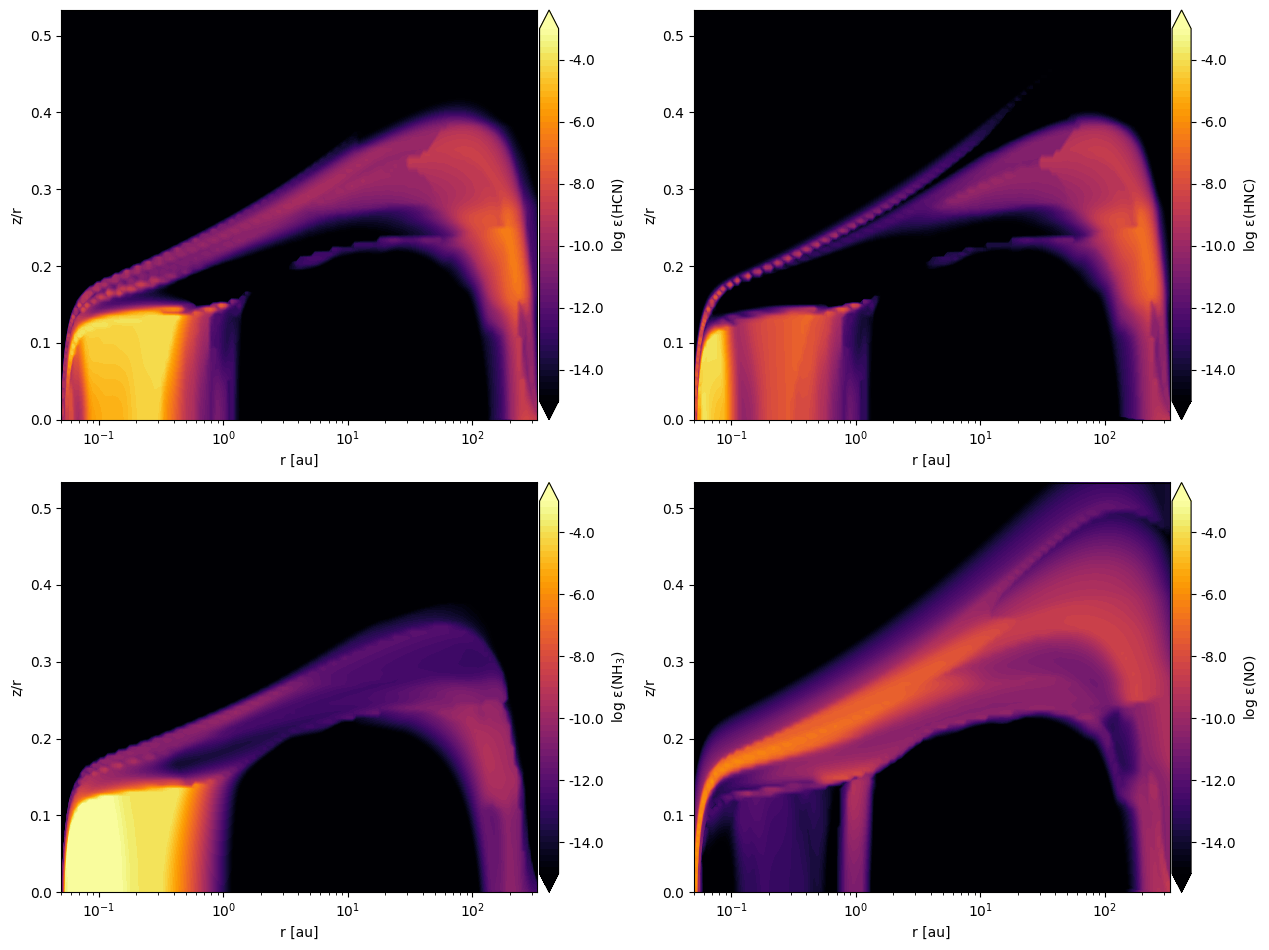

In [28]:
for i,model in enumerate(models):
    if i != 12:
        continue
    # fig, axs = plt.subplots(1, 2, figsize=(9, 2.7))
    pp=pplot.Plot(None)

    tcont=pplot.Contour(model.tg, [20,100,1000], linestyles=["-","--",":"],
                      showlabels=True,label_fontsize=10,label_fmt="%.0f")
    #tcont.label_locations=[(100,100),(55,5),(40,5)]

    # another contour, a simple one
    avcont=pplot.Contour(model.AV,[1.0],colors="black")

    cbticks=[10,30,100,300,1000]
    _ =pp.plot_abuncont_grid(model,
                          ["HCN","HNC" ,"NH3","NO"],nrows=2, ncols=2,
                          zlim=[1.e-15,1.e-3],extend="both",contour=False, cmap='inferno')
    plt.tight_layout()
    # _ =pp.plot_abuncont_grid(model,
    #                       ["HCN#","NH3#","NO#","H2O#"],nrows=2, ncols=2,
    #                       zlim=[1.e-8,1.e-3],extend="both",contour=False, cmap='inferno')
plt.savefig('Figures/Abundance.pdf')
plt.show()

In [3]:
colors = [
    "red", "blue", "green", "orange", "purple", "brown", "pink", "gray",
    "olive", "cyan", "magenta", "gold", "lime", "navy", "teal", "maroon",
    "coral", "darkgreen", "skyblue", "violet", "chocolate", "crimson",
    "darkgray", "turquoise", "orchid"
]

INFO: gen_specFromLineEstimates: build spectrum for 26457 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  19.54 s


(11.1, 17.5)

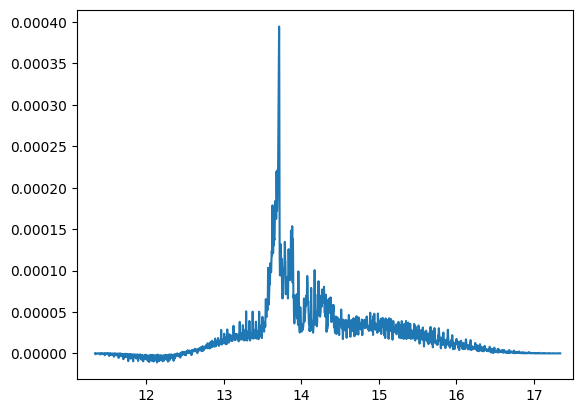

In [19]:
spec = models[4].gen_specFromLineEstimates(ident='C2H2_H',wlrange=[4.9, 28.4],unit="Jy",specR=3000,noCont=True)
plt.plot(spec[0][(spec[1]!=0)&(spec[0]>10)],spec[1][(spec[1]!=0)&(spec[0]>10)])
plt.xlim(11.1, 17.5)

PLOT: plot_NH ...


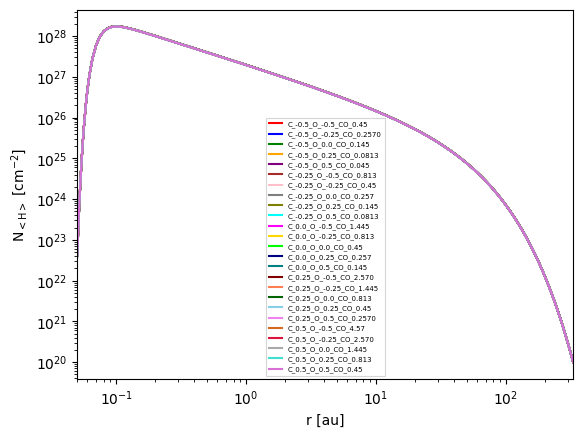

In [4]:
pms=ppms.PlotModels(None, colors=colors, fs_legend=5)
pms.plot_NH(models, xlog=True)
plt.show()

PLOT: plot_tcdspec ...
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calculate vertical column densities
INFO: Calcu

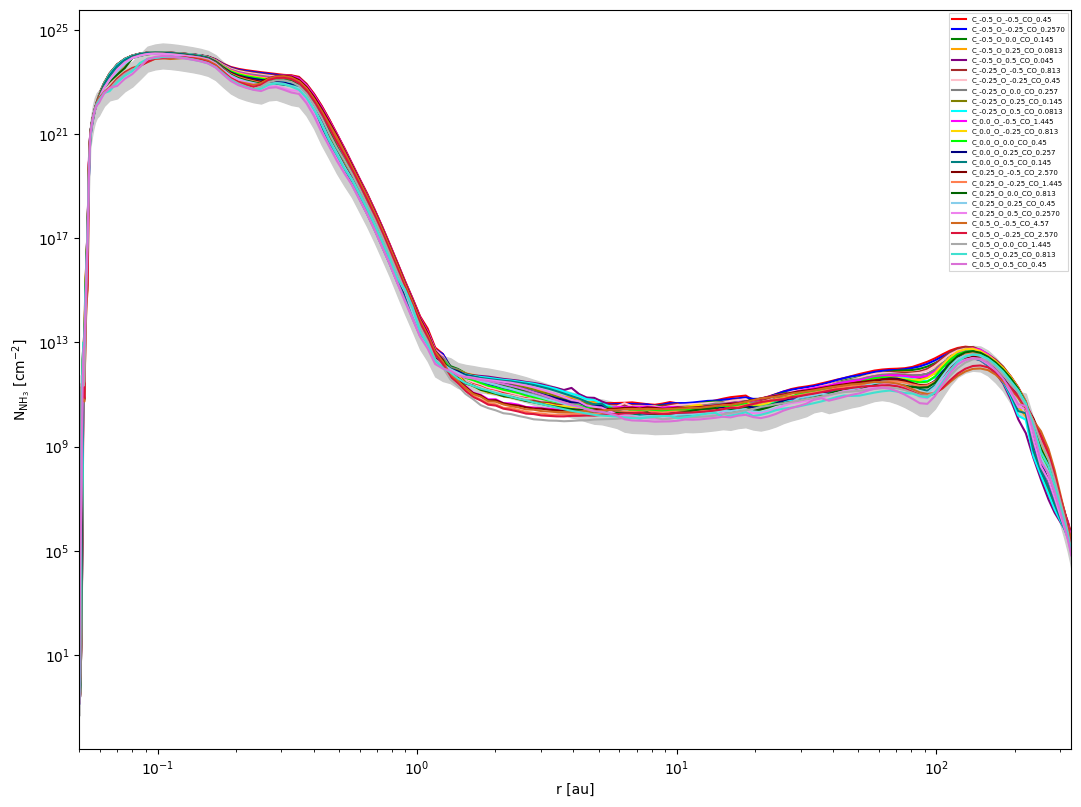

In [5]:
pms.plot_tcdspec(models, 'NH3', xlog=True, sfigs=[2, 2])
plt.show()

PLOT: plot_tauline ...


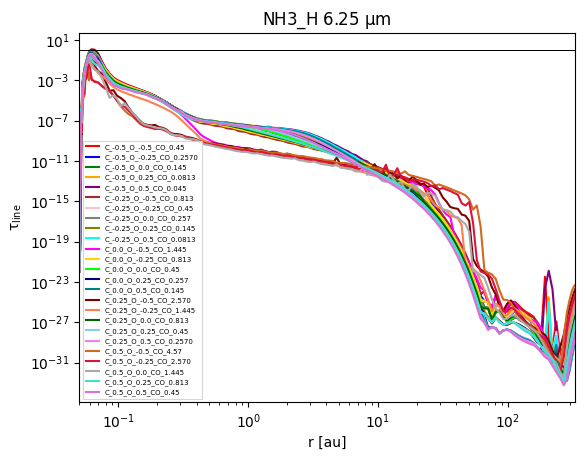

In [6]:
pms.plot_tauline(models, ['NH3_H', 6.25])
plt.show()

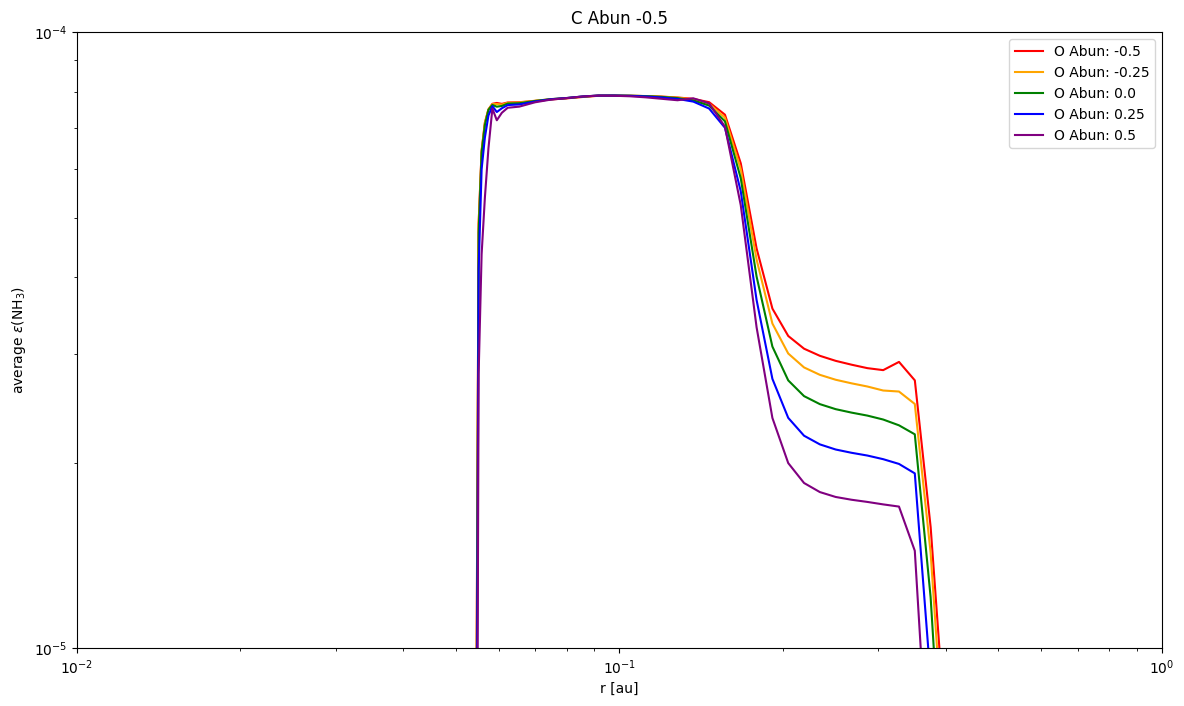

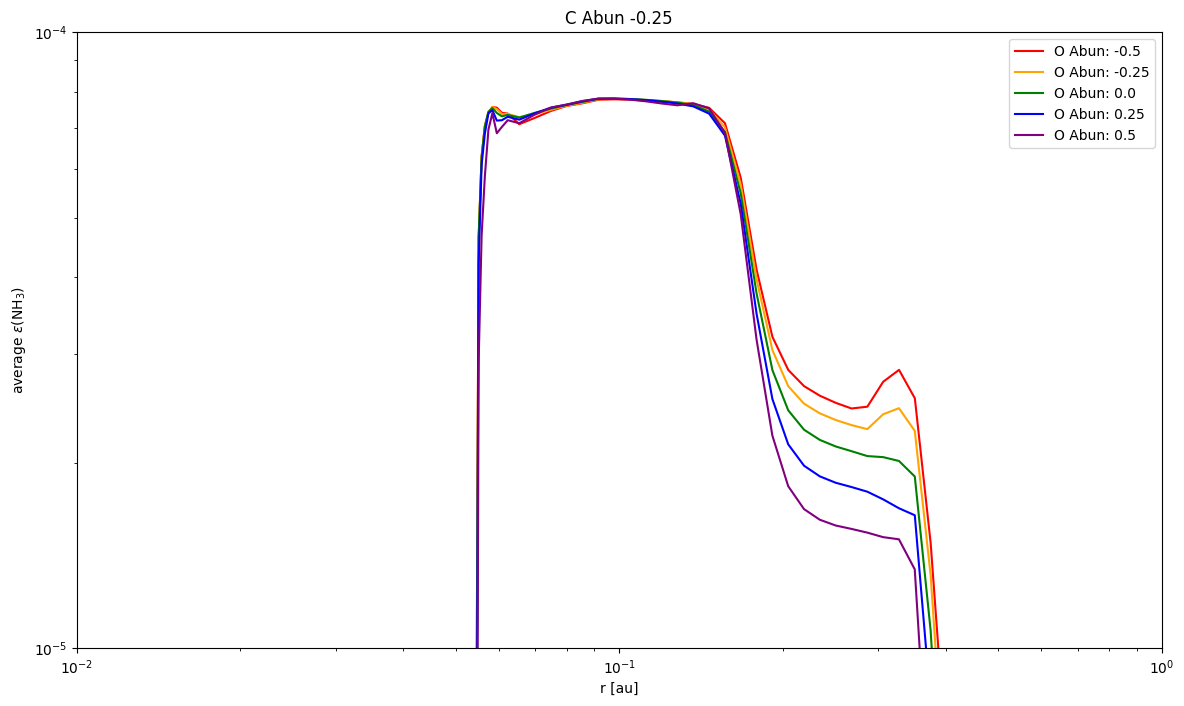

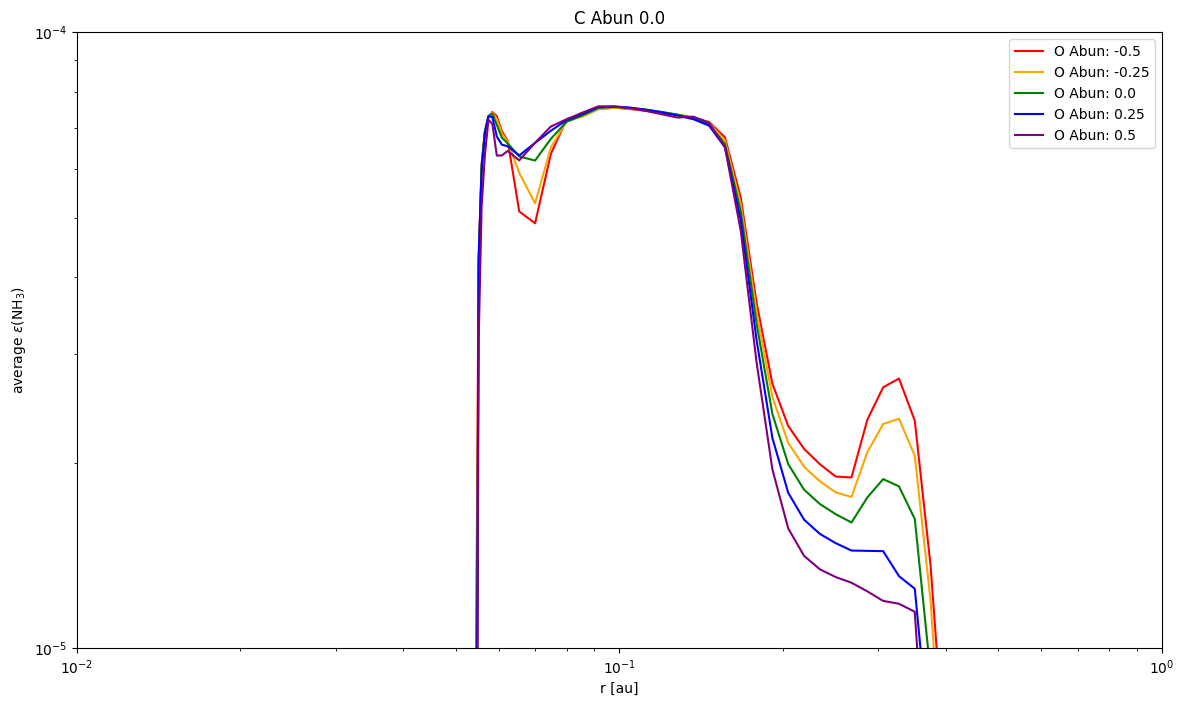

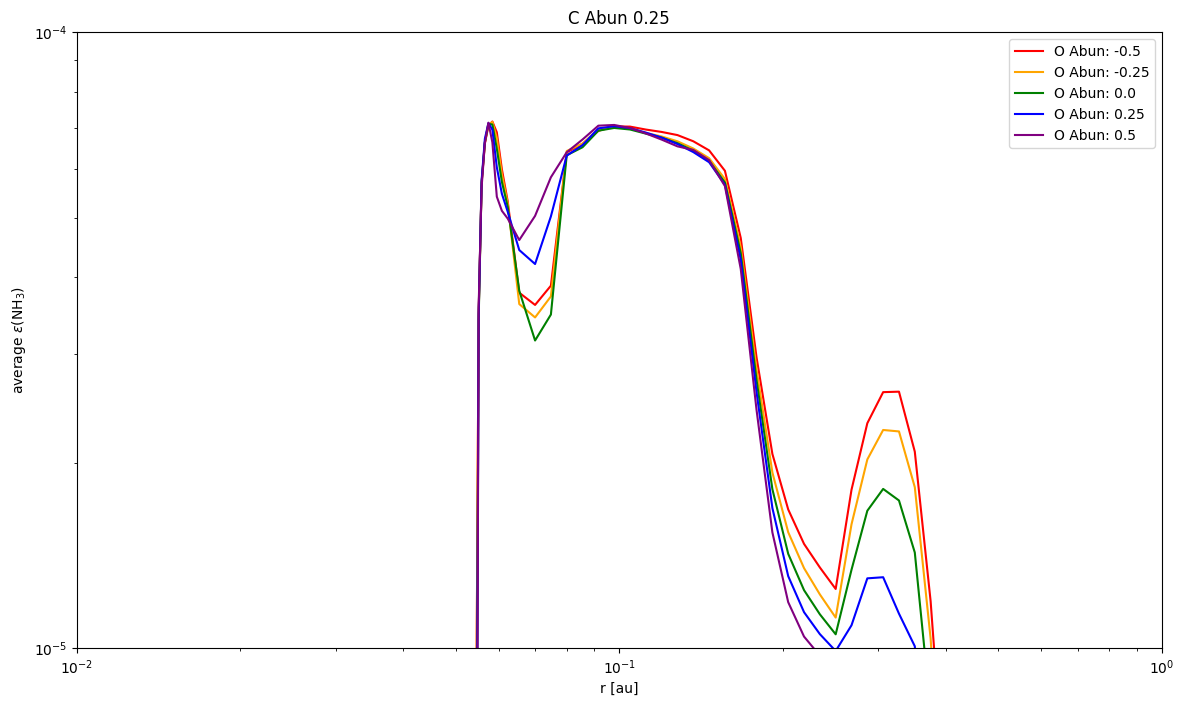

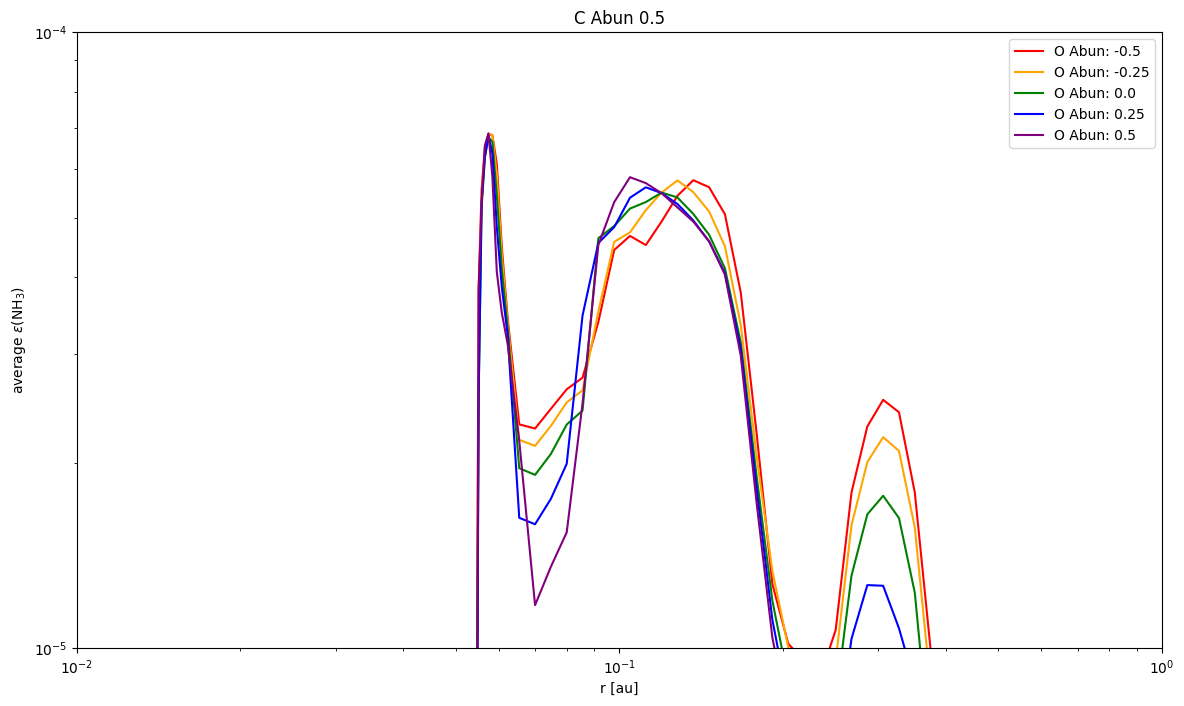

<Figure size 1400x800 with 0 Axes>

In [7]:
import re

pattern = r'C_(.*?)_O_(.*?)_CO'

for specie in ['NH3']:
    # fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    plt.figure(figsize=(14, 8))
    for i, model in enumerate(models):
        # get the species
        
        match = re.search(pattern, model.name)
        C_value = match.group(1)
        O_value = match.group(2)
        if (specie in model.spnames):
            if O_value == '-0.5':
                color = 'red'
            elif O_value == '-0.25':
                color = 'orange'
            elif O_value == '0.0':
                color = 'green'
            elif O_value == '0.25':
                color = 'blue'
            elif O_value == '0.5':
                color = 'purple'
            y = model.cdnmol[:, 0, model.spnames[specie]]
            y = y / model.NHver[:, 0]
            x = model.x[:, 0]
            plt.plot(x, y, marker=None, color=color, label=f'O Abun: {O_value}') #colors[iplot]
            if i % 5 == 4:
                plt.title(f'C Abun {(i // 5) / 4 - 0.5}')
                plt.xlabel(r"r [au]")
                plt.ylabel(r"average $\epsilon(\mathrm{"+pplot.spnToLatex(specie)+"})$")
                plt.xlim([1e-2, 1])
                plt.ylim([1e-5, 1e-4])
                plt.xscale('log')
                plt.yscale('log')
                plt.legend()
                plt.show()
                plt.figure(figsize=(14, 8))
    # ax.set_xlabel(r"r [au]")
    # ax.set_ylabel(r"average $\epsilon(\mathrm{"+pplot.spnToLatex(specie)+"})$")
    # 
    # # do axis style
    # ax.semilogx()
    # ax.semilogy()
    # # ax.set_ylim([1e-8, 1e-2])
    # ax.set_xlim([None, 1])
    # ax.legend()
    # plt.savefig(f'Abundances_{specie}.png')
    # plt.show()

PLOT: plot_abunvert ...


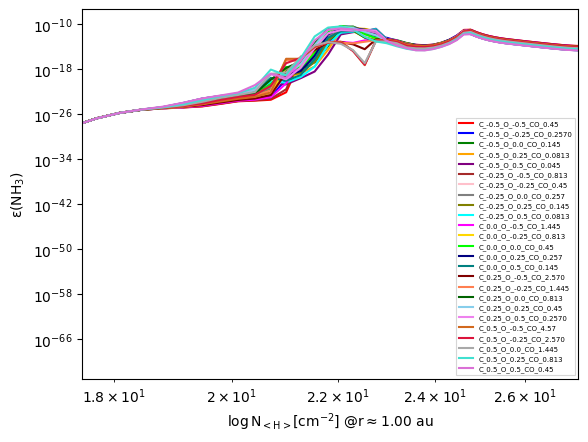

In [8]:
pms.plot_abunvert(models, 1, 'NH3', xlog=True)
plt.show()

PLOT: plot_tauline ...


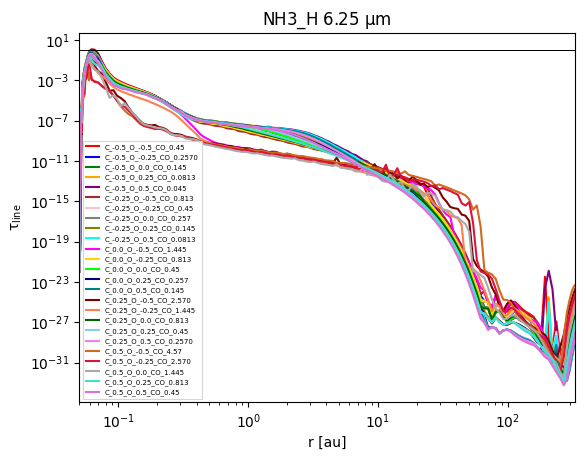

In [9]:
pms.plot_tauline(models, ['NH3_H', 6.25])
plt.show()

In [10]:
# with open("AllModels.pkl", "wb") as file:
#     pickle.dump(models, file)

In [11]:
# with open('AllModels.pkl', 'rb') as f:
#     models = pickle.load(f)

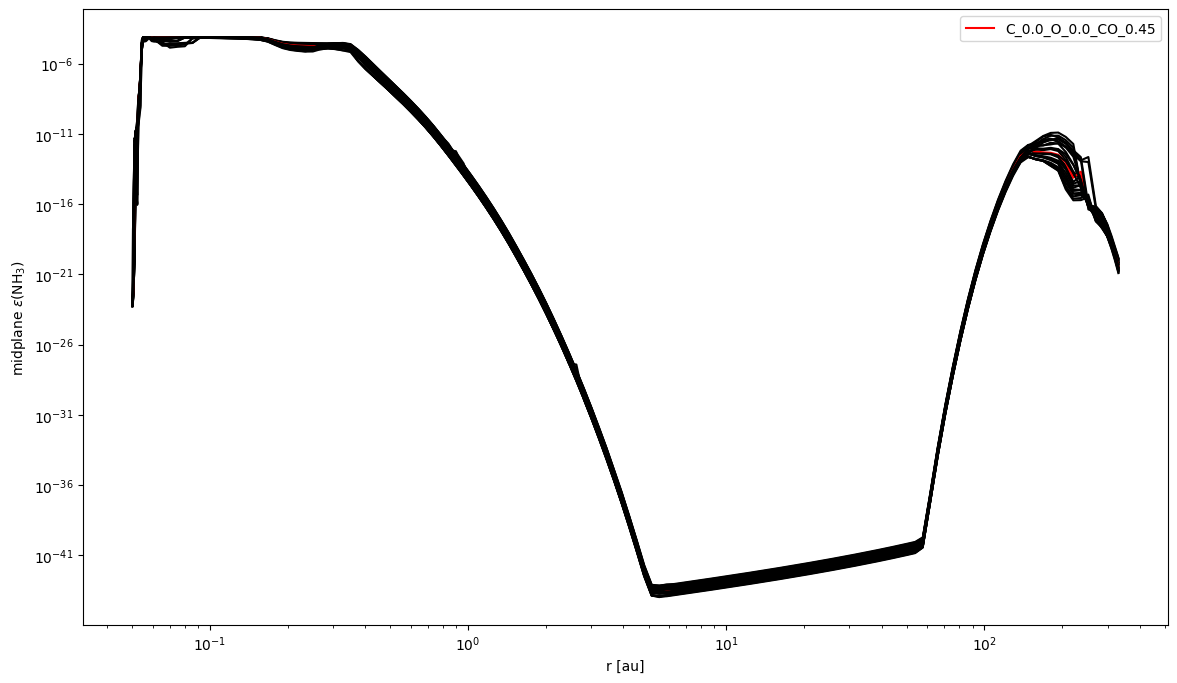

In [12]:
specie = 'NH3'
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
iplot = 0
xmin = 1.e100
xmax = 0
for model in models:
    x = model.x[:, 0]
    y = model.nmol[:, 0, model.spnames[specie]] / model.nHtot[:, 0]

    # this is not general, removed it
    # if iplot==0 or iplot==(len(models)-1):
    #  line,=ax.plot(x,y,self.styles[iplot],marker=None,color=self.colors[iplot],label=model.name,linewidth=2.5)
    # else:
    if model.name == 'C_0.0_O_0.0_CO_0.45':
        ax.plot(x, y, marker=None, color='red', label=model.name)
    else:
        ax.plot(x, y, marker=None, color='black')  #colors[iplot]
    # ax.plot(x, y, self.styles[iplot], marker=None, color=self.colors[iplot], label=model.name)

    iplot = iplot + 1
ax.semilogy()
ax.semilogx()
ax.set_xlabel(r"r [au]")
ax.set_ylabel(r"midplane $\epsilon(\mathrm{"+pplot.spnToLatex(specie)+"})$")
ax.legend()
plt.savefig(f'Midplane_Abundance_{specie}.png')
plt.show()

In [13]:
# plt.close('all')
# specie = 'NO'
# for i in range(25):
#     if df['O Value'][i] == '-0.5':
#         color = 'red'
#     elif df['O Value'][i] == '-0.25':
#         color = 'orange'
#     elif df['O Value'][i] == '0.0':
#         color = 'green'
#     elif df['O Value'][i] == '0.25':
#         color = 'blue'
#     elif df['O Value'][i] == '0.5':
#         color = 'purple'
#     plt.plot(df[f'FLiTs {specie} Wavelength'][i], df[f'FLiTs {specie} Flux'][i], color=color,
#              label=f"O Abun: {df['O Value'][i]}")
#     if i % 5 == 4:
#         plt.title(f'C Abun {(i // 5) / 4 - 0.5}')
#         plt.xlim(5.33, 5.35)
#         plt.xlabel(r'Wavelength ($\mu$m)')
#         plt.ylabel('Flux (Jy)')
#         plt.legend()
#         plt.show()

PLOT: plot_abuncont ...


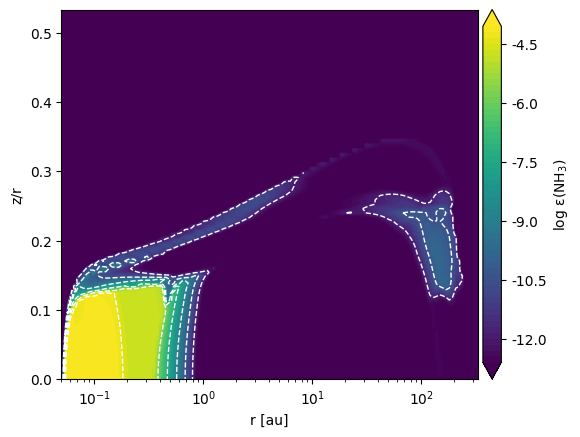

PLOT: plot_abuncont ...


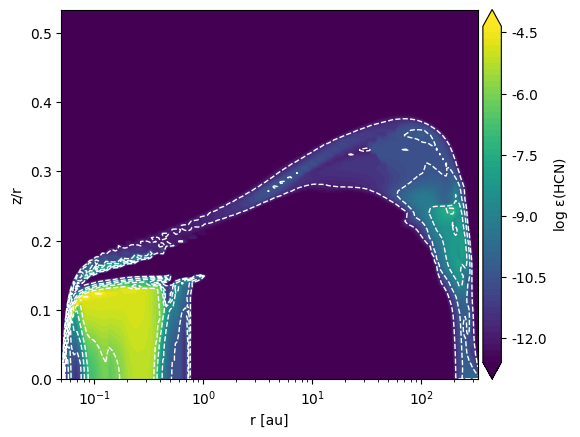

PLOT: plot_abuncont ...


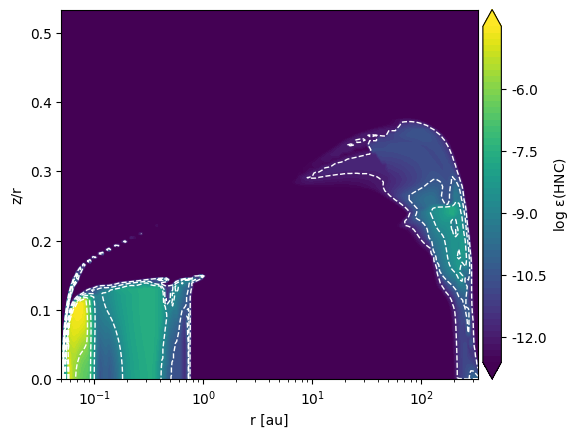

PLOT: plot_abuncont ...


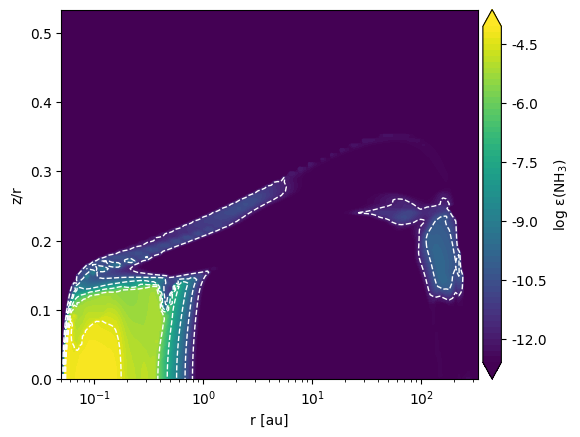

PLOT: plot_abuncont ...


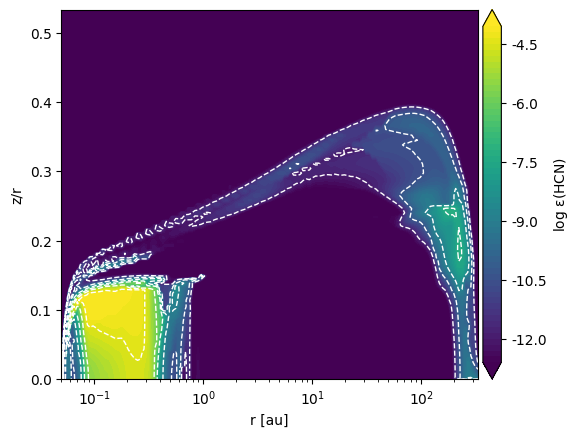

PLOT: plot_abuncont ...


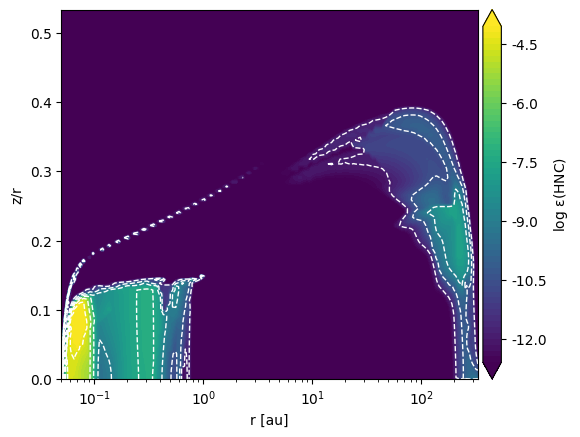

In [14]:
for index, model in enumerate(models):
    pp = pplot.Plot(None)
    if index == 4 or index == 19:
        pp.plot_abuncont(model, 'NH3')
        plt.show()
        pp.plot_abuncont(model, 'HCN')
        plt.show()
        pp.plot_abuncont(model, 'HNC')
        plt.show()